# Introduction

- Nama: Argon
- Batch: HCK 004

- Background
Tumor otak merupakan salah satu penyakit ganas yang ada di dunia kesehatan dan menjangkit ke anak kecil maupun orang dewasa. Setiap tahunnya terdapat sekitar 11,700 orang yang terdiagnosi tumor otak. Ekspektasi hidup 5 tahun dari pasien dengan kanker otak atau Central Nervouse System (CNS) tumor adalah 34% untuk pria dan 36% untuk wanita

Link source background & dataset *https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri*


Klasifikasi kondisi tumor otak dari dataset ini terdiri dari 3 jenis:

**Glioma Tumor**
Gliomas adalah tumor otak yang bermula di sel glial (sel yang berfungsi sebagai pendukung kerja sel saraf)

*https://www.cancerresearchuk.org/about-cancer/brain-tumours/types/glioma-adults*

**Meningioma Tumor**
Meningioma adalah jenis tumor otak yang paling sering terjadi (penyebab 30% kasus tumor otak)

Tumor ini berawal di lapisan meninges (lapisan atau membran tipis yang berfungsi menutupi dan melindungi otak dan saraf tulang belakang)

Meningiomas tumbuh di tengah lapisan meninges (yang dinamakan arachnoid). Tumor ini tumbuh dengan lambat dan aktif secara menahun sebelum terdekteksi

*https://www.hopkinsmedicine.org/health/conditions-and-diseases/meningioma*

**Pituitary Tumor**
Pituitary Tumor adalah regenerasi abnormal yang terjadi di kelenjar pituitari(organ kecil yang berada di bawah otak. Kelenjar ini berfungsi menghasilkan hormon yang mengatur banyak proses dan fungsi organ tubuh, termasuk proses pertumbuhan, fungsi reproduksi dan metabolisme)

Sebagian besar kasus tumor pituitary tidak ada gejala, sehingga sulit untuk terdiagnosa. Di banyak kasus, tumor ini terdeteksi hanya pada saat test brain imaging yang dilakukan secara rutin. Sebanyak 25% masyarakat terjangkit tumor pituitary kecil tanpa menyadarinya

*https://www.hopkinsmedicine.org/health/conditions-and-diseases/pituitary-tumors*

- Objective
Tujuan dari laporan ini adalah membuat suatu model yang mampu mendeteksi adanya kondisi tumor otak


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
! pip install keras_preprocessing
from tensorflow.keras import layers
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from keras.models import Model, Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D ,Dense
from keras.applications.efficientnet_v2 import EfficientNetV2M
from keras.optimizers import Adam
from pathlib import Path
!pip install -q jmd_imagescraper
from jmd_imagescraper.core import *
import glob
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
import pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.3 MB/s eta 0:00:00


# Data Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/M2-Phase2/milestone2/

/content/drive/My Drive/M2-Phase2/milestone2


In [4]:
IMG_SIZE = 400
path = '/content/drive/MyDrive/M2-Phase2/milestone2/'

datagen = tf.keras.preprocessing.image.ImageDataGenerator()
data = datagen.flow_from_directory(path, (IMG_SIZE, IMG_SIZE), batch_size=32, class_mode='binary') #class_mode = categorical for multiclass

Found 3669 images belonging to 3 classes.


In [5]:
train_glioma_files = glob.glob('/content/drive/MyDrive/M2-Phase2/milestone2/Training/glioma_tumor/*')
train_meningioma_files = glob.glob('/content/drive/MyDrive/M2-Phase2/milestone2/Training/meningioma_tumor/*')
train_no_files = glob.glob('/content/drive/MyDrive/M2-Phase2/milestone2/Training/no_tumor/*')
train_pituitary_files = glob.glob('/content/drive/MyDrive/M2-Phase2/milestone2/Training/pituitary_tumor/*')
test_glioma_files = glob.glob('/content/drive/MyDrive/M2-Phase2/milestone2/Testing/glioma_tumor/*')
test_meningioma_files = glob.glob('/content/drive/MyDrive/M2-Phase2/milestone2/Testing/meningioma_tumor/*')
test_no_files = glob.glob('/content/drive/MyDrive/M2-Phase2/milestone2/Testing/no_tumor/*')
test_pituitary_files = glob.glob('/content/drive/MyDrive/M2-Phase2/milestone2/Testing/pituitary_tumor/*')

# Exploratory Data Analysis (EDA)

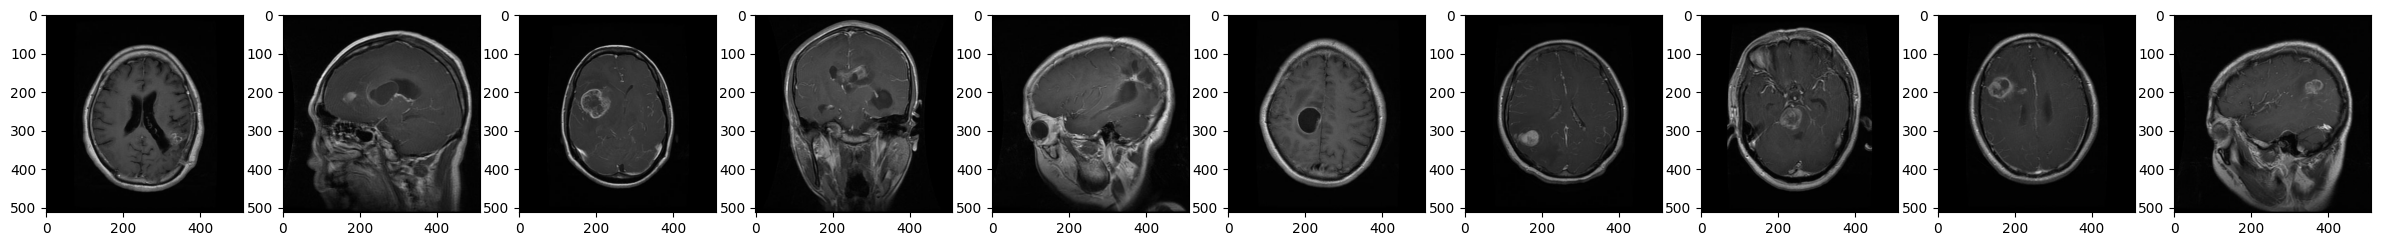

In [6]:
fig,ax = plt.subplots(ncols=10,figsize=(30,3))
for i in range(10):
  tr_glioma = plt.imread(train_glioma_files[i])
  ax[i].imshow(tr_glioma)

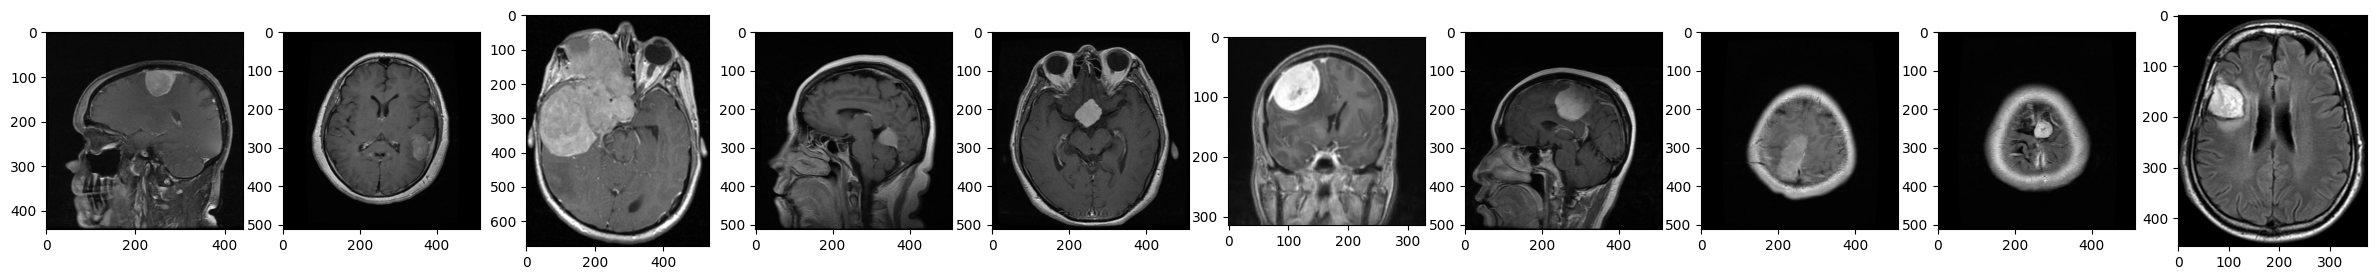

In [7]:
fig,ax = plt.subplots(ncols=10,figsize=(30,3))
for i in range(10):
  tr_meningioma = plt.imread(train_meningioma_files[i])
  ax[i].imshow(tr_meningioma)

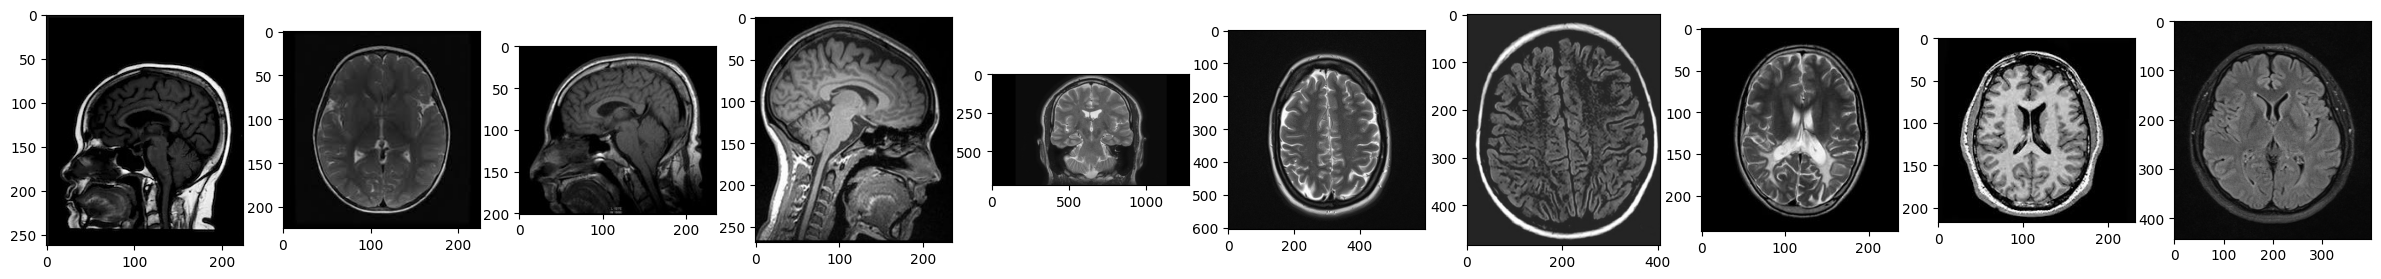

In [8]:
fig,ax = plt.subplots(ncols=10,figsize=(30,3))
for i in range(10):
  tr_no = plt.imread(train_no_files[i])
  ax[i].imshow(tr_no)

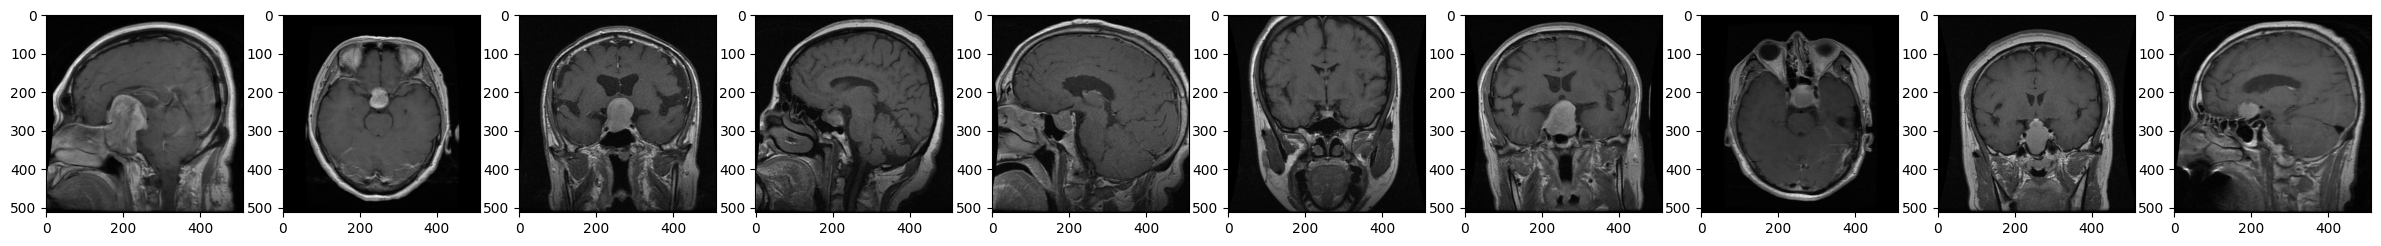

In [9]:
fig,ax = plt.subplots(ncols=10,figsize=(30,3))
for i in range(10):
  tr_pituitary = plt.imread(train_pituitary_files[i])
  ax[i].imshow(tr_pituitary)

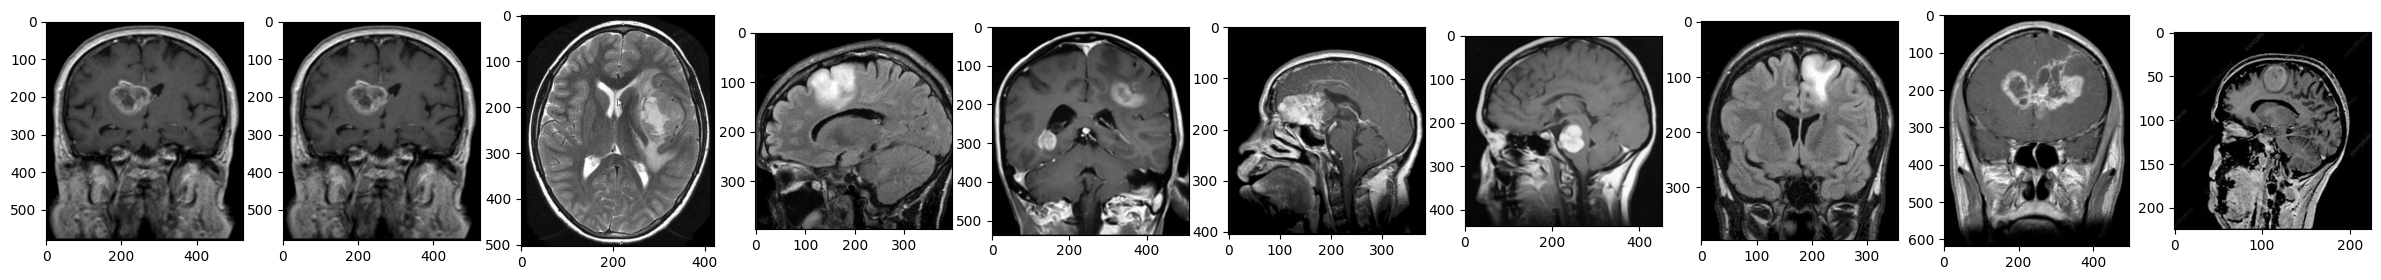

In [10]:
fig,ax = plt.subplots(ncols=10,figsize=(30,3))
for i in range(10):
  ts_glioma = plt.imread(test_glioma_files[i])
  ax[i].imshow(ts_glioma)

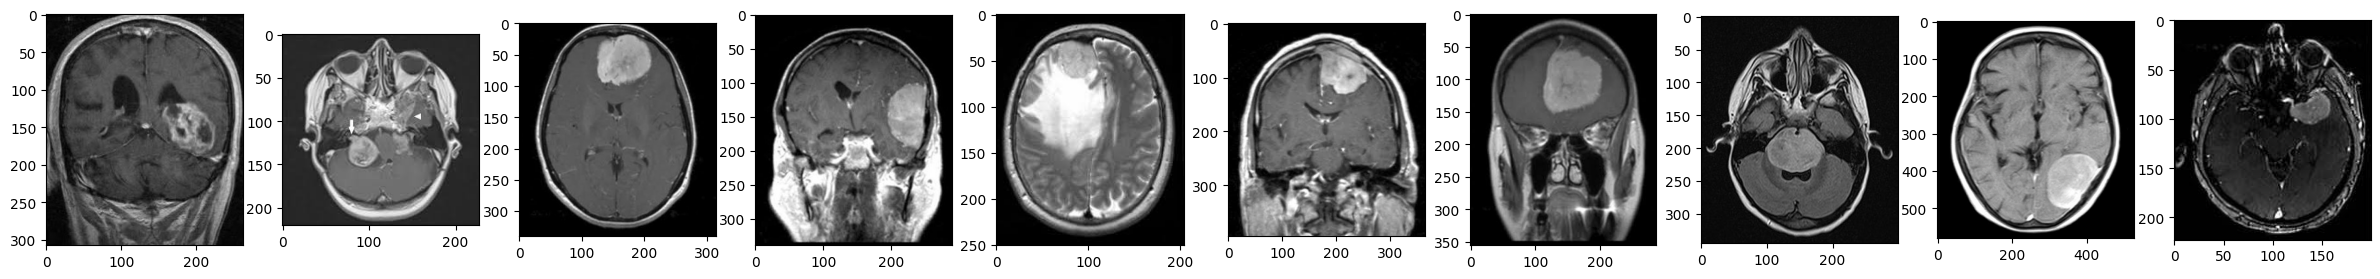

In [11]:
fig,ax = plt.subplots(ncols=10,figsize=(30,3))
for i in range(10):
  ts_meningioma = plt.imread(test_meningioma_files[i])
  ax[i].imshow(ts_meningioma)

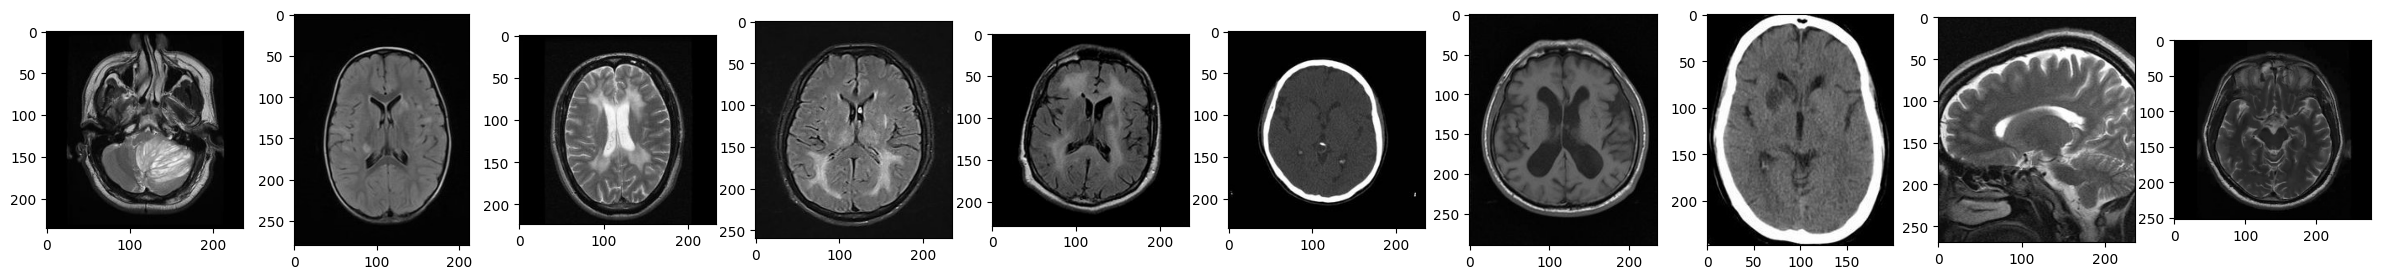

In [12]:
fig,ax = plt.subplots(ncols=10,figsize=(30,3))
for i in range(10):
  ts_no = plt.imread(test_no_files[i])
  ax[i].imshow(ts_no)

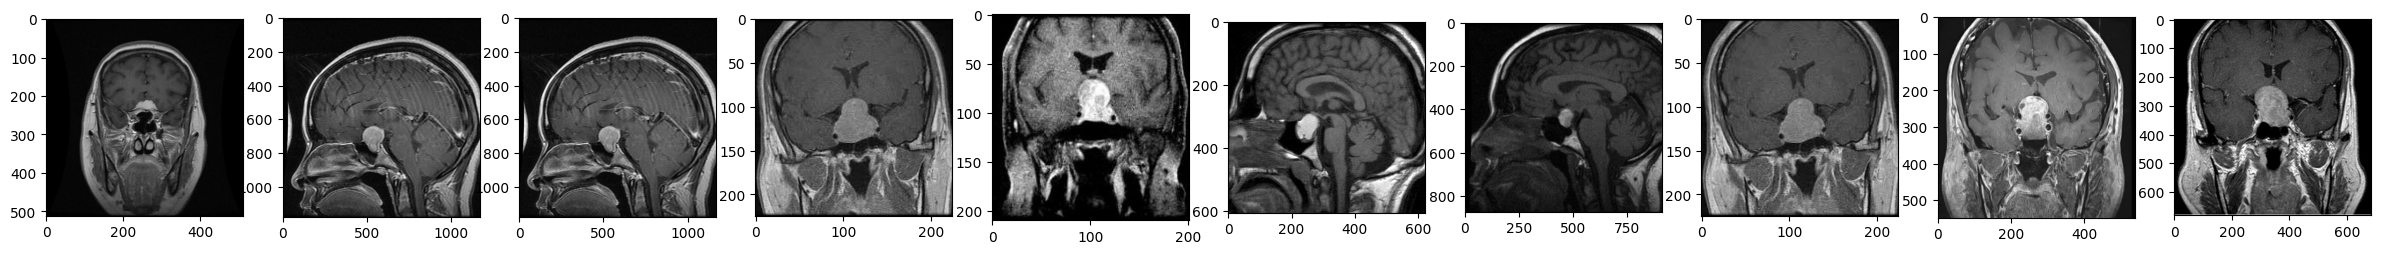

In [13]:
fig,ax = plt.subplots(ncols=10,figsize=(30,3))
for i in range(10):
  ts_pituitary = plt.imread(test_pituitary_files[i])
  ax[i].imshow(ts_pituitary)

Insight:

Dari gambar di atas terihat bahwa foto MRI di setiap jenis tumor sudah beragam (tampak samping, tampak atas & tampak belakang). Dikarenakan foto MRI mempunyai standard yang sudah ditetapkan maka dari itu di tahap data augmentasi nanti hanya akan dilakukan metode augmentasi shear saja 

In [14]:
IMG_SIZE = 400
path = '/content/drive/MyDrive/M2-Phase2/milestone2/Training/'

datagen = tf.keras.preprocessing.image.ImageDataGenerator()
data = datagen.flow_from_directory(path, (IMG_SIZE, IMG_SIZE), batch_size=32, class_mode='categorical') #class_mode = categorical for multiclass

Found 3275 images belonging to 4 classes.


Insight:

Dari 3,275 gambar yang ada di set training dibagi menjadi 4 kelas:

- kelas 1: Glioma Tumor
- kelas 2: Meningioma Tumor
- kelas 3: No Tumor(kondisi sehat)
- kelas 4: Pituitary Tumor

In [15]:
len(data.next())

2

In [16]:
data.next()[0].shape

(32, 400, 400, 3)

In [17]:
data.next()[0][0]

array([[[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 2.,  2.,  2.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 2.,  2.,  2.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 2.,  2.,  2.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       ...,

       [[ 2.,  2.,  2.],
        [ 2.,  2.,  2.],
        [ 0.,  0.,  0.],
        ...,
        [12., 12., 12.],
        [12., 12., 12.],
        [12., 12., 12.]],

       [[ 4.,  4.,  4.],
        [ 4.,  4.,  4.],
        [ 1.,  1.,  1.],
        ...,
        [13., 13., 13.],
        [13., 13., 13.],
        [13., 13., 13.]],

       [[ 4.,  4.,  4.],
        [ 4.,  4.,  4.],
        [ 1.,  1.,  1.],
        ...,
        [13., 13., 13.],
        [13., 13., 13.],
        [13., 13., 13.]]

In [18]:
IMG_SIZE = 400
path_test = '/content/drive/MyDrive/M2-Phase2/milestone2/Testing/'

datagen_test = tf.keras.preprocessing.image.ImageDataGenerator()
data_test = datagen_test.flow_from_directory(path_test, (IMG_SIZE, IMG_SIZE), batch_size=32, class_mode='categorical') #class_mode = categorical for multiclass

Found 394 images belonging to 4 classes.


In [19]:
len(data_test.next())

2

In [20]:
data_test.next()[0].shape

(32, 400, 400, 3)

In [21]:
data_test.next()[0][0]

array([[[19., 19., 19.],
        [19., 19., 19.],
        [19., 19., 19.],
        ...,
        [14., 14., 14.],
        [14., 14., 14.],
        [14., 14., 14.]],

       [[19., 19., 19.],
        [19., 19., 19.],
        [19., 19., 19.],
        ...,
        [14., 14., 14.],
        [14., 14., 14.],
        [14., 14., 14.]],

       [[19., 19., 19.],
        [19., 19., 19.],
        [19., 19., 19.],
        ...,
        [15., 15., 15.],
        [15., 15., 15.],
        [15., 15., 15.]],

       ...,

       [[19., 19., 19.],
        [19., 19., 19.],
        [19., 19., 19.],
        ...,
        [16., 16., 16.],
        [16., 16., 16.],
        [16., 16., 16.]],

       [[19., 19., 19.],
        [19., 19., 19.],
        [19., 19., 19.],
        ...,
        [16., 16., 16.],
        [16., 16., 16.],
        [16., 16., 16.]],

       [[19., 19., 19.],
        [19., 19., 19.],
        [19., 19., 19.],
        ...,
        [16., 16., 16.],
        [16., 16., 16.],
        [16., 16., 16.]]

# Feature Engineering

/usr/local/lib/python3.9/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


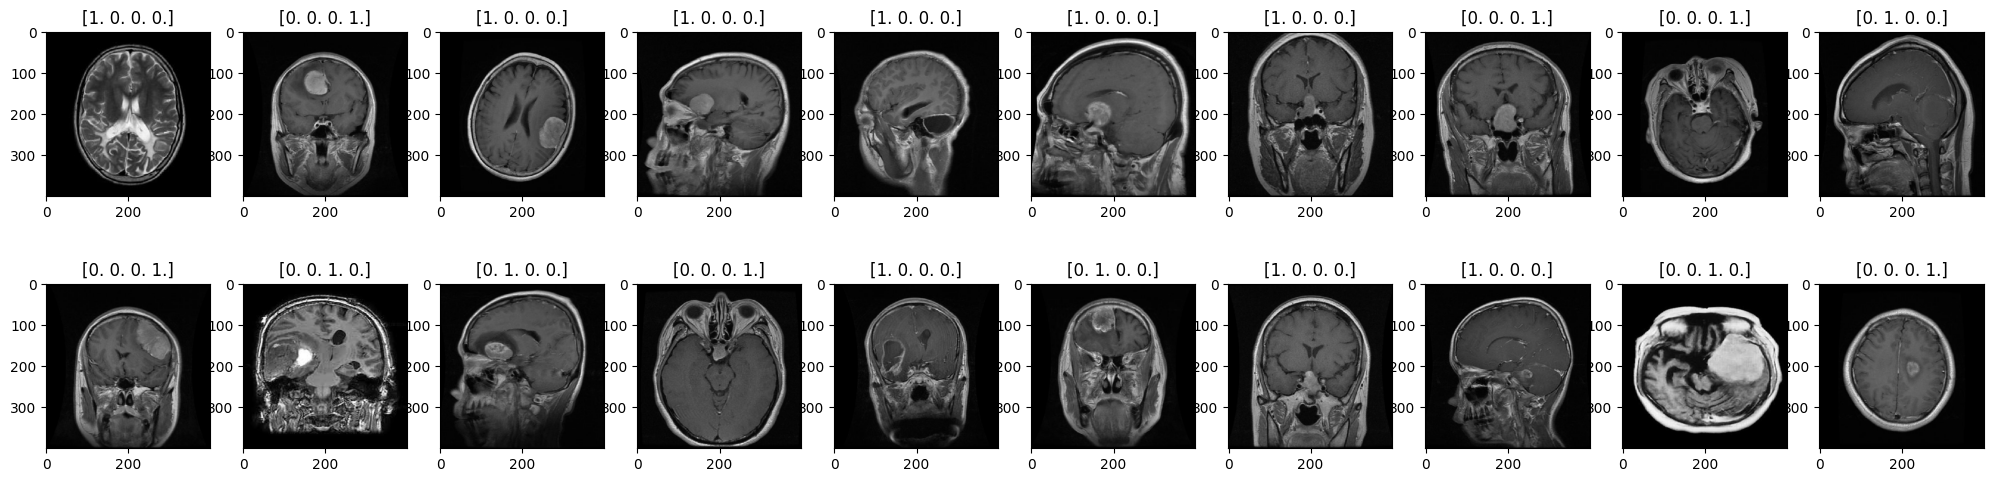

In [22]:
fig,ax = plt.subplots(nrows=2,ncols=10,figsize=(25,6))
n=0
for i in range(2):
  for j in range(10):
    img = data.next()[0][n].astype('uint8')
    ax[i][j].imshow(img)
    ax[i][j].set_title(data.next()[1][n])
    n+=1

Dari sample gambar di atas, terlihat bahwa gambar telah memiliki variasi bentuk (tampak depan, tampak samping, tampak atas) sehingga saya tidak melakukan data augmentasi lebih lanjut dalam proses pengolahan data

In [23]:
data.class_indices

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

In [24]:
imgs = train_glioma_files+train_meningioma_files+train_no_files+train_pituitary_files
labels = ['glioma_tumor' for i in range(len(train_glioma_files))]+['meningioma_tumor' for i in range(len(train_meningioma_files))]+['no_tumor' for i in range(len(train_no_files))]+['pituitary_tumor' for i in range(len(train_pituitary_files))]
data = pd.DataFrame({'images':imgs,'label':labels})
data = data.sample(len(data)).reset_index(drop=True)
data

images             label
0     /content/drive/MyDrive/M2-Phase2/milestone2/Tr...      glioma_tumor
1     /content/drive/MyDrive/M2-Phase2/milestone2/Tr...  meningioma_tumor
2     /content/drive/MyDrive/M2-Phase2/milestone2/Tr...   pituitary_tumor
3     /content/drive/MyDrive/M2-Phase2/milestone2/Tr...  meningioma_tumor
4     /content/drive/MyDrive/M2-Phase2/milestone2/Tr...   pituitary_tumor
...                                                 ...               ...
2876  /content/drive/MyDrive/M2-Phase2/milestone2/Tr...   pituitary_tumor
2877  /content/drive/MyDrive/M2-Phase2/milestone2/Tr...   pituitary_tumor
2878  /content/drive/MyDrive/M2-Phase2/milestone2/Tr...          no_tumor
2879  /content/drive/MyDrive/M2-Phase2/milestone2/Tr...  meningioma_tumor
2880  /content/drive/MyDrive/M2-Phase2/milestone2/Tr...  meningioma_tumor

[2881 rows x 2 columns]

Dalam set data train yang sudah disiapkan kaggle, terdapat 2,881 baris data dengan 4 kategori (glioma tumor, meningioma tumor, no tumor & pituitary tumor)

In [25]:
print(data.shape)
print(data['label'].value_counts())

(2881, 2)
meningioma_tumor    832
glioma_tumor        827
pituitary_tumor     827
no_tumor            395
Name: label, dtype: int64


In [26]:
data_test.class_indices

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

In [27]:
imgs = test_glioma_files+test_meningioma_files+test_no_files+test_pituitary_files
labels = ['glioma_tumor' for i in range(len(test_glioma_files))]+['meningioma_tumor' for i in range(len(test_meningioma_files))]+['no_tumor' for i in range(len(test_no_files))]+['pituitary_tumor' for i in range(len(test_pituitary_files))]
data_test = pd.DataFrame({'images':imgs,'label':labels})
data_test = data_test.sample(len(data_test)).reset_index(drop=True)
data_test

images             label
0    /content/drive/MyDrive/M2-Phase2/milestone2/Te...  meningioma_tumor
1    /content/drive/MyDrive/M2-Phase2/milestone2/Te...   pituitary_tumor
2    /content/drive/MyDrive/M2-Phase2/milestone2/Te...      glioma_tumor
3    /content/drive/MyDrive/M2-Phase2/milestone2/Te...          no_tumor
4    /content/drive/MyDrive/M2-Phase2/milestone2/Te...  meningioma_tumor
..                                                 ...               ...
389  /content/drive/MyDrive/M2-Phase2/milestone2/Te...          no_tumor
390  /content/drive/MyDrive/M2-Phase2/milestone2/Te...   pituitary_tumor
391  /content/drive/MyDrive/M2-Phase2/milestone2/Te...          no_tumor
392  /content/drive/MyDrive/M2-Phase2/milestone2/Te...  meningioma_tumor
393  /content/drive/MyDrive/M2-Phase2/milestone2/Te...  meningioma_tumor

[394 rows x 2 columns]

Dalam set data test yang sudah disiapkan kaggle, terdapat 394 baris data dengan 4 kategori (glioma tumor, meningioma tumor, no tumor & pituitary tumor)

In [28]:
print(data_test.shape)
print(data_test['label'].value_counts())

(394, 2)
meningioma_tumor    115
no_tumor            105
glioma_tumor        100
pituitary_tumor      74
Name: label, dtype: int64


In [29]:
# merge both dataframes
df = pd.concat([data, data_test], axis=0)
df = df.reset_index(drop = True)
display(df.head())
print(df.shape)
print(df['label'].value_counts())

images             label
0  /content/drive/MyDrive/M2-Phase2/milestone2/Tr...      glioma_tumor
1  /content/drive/MyDrive/M2-Phase2/milestone2/Tr...  meningioma_tumor
2  /content/drive/MyDrive/M2-Phase2/milestone2/Tr...   pituitary_tumor
3  /content/drive/MyDrive/M2-Phase2/milestone2/Tr...  meningioma_tumor
4  /content/drive/MyDrive/M2-Phase2/milestone2/Tr...   pituitary_tumor

(3275, 2)
meningioma_tumor    947
glioma_tumor        927
pituitary_tumor     901
no_tumor            500
Name: label, dtype: int64


Saya melakukan penggabungan set data train & test untuk bisa membuat set data ketiga yaitu data validasi untuk proses analisa selanjutnya

In [30]:
# Separate in train and test data
train_df, test_df = train_test_split(df, train_size=0.85, shuffle=True, random_state=1)

In [31]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet_v2.preprocess_input,
    validation_split=0.15
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet_v2.preprocess_input)

In [43]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='images',
    y_col='label',
    target_size=(512, 512),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=4,
    shuffle=True,
    seed=42,
    subset='training'
)

Found 2365 validated image filenames belonging to 4 classes.


/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="images". These filename(s) will be ignored.
  warnings.warn(


In [44]:
val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='images',
    y_col='label',
    target_size=(512, 512),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=4,
    shuffle=True,
    seed=42,
    subset='validation'
)

Found 417 validated image filenames belonging to 4 classes.


/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="images". These filename(s) will be ignored.
  warnings.warn(


In [45]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='images',
    y_col='label',
    target_size=(512, 512),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=4,
    shuffle=False
)

Found 492 validated image filenames belonging to 4 classes.


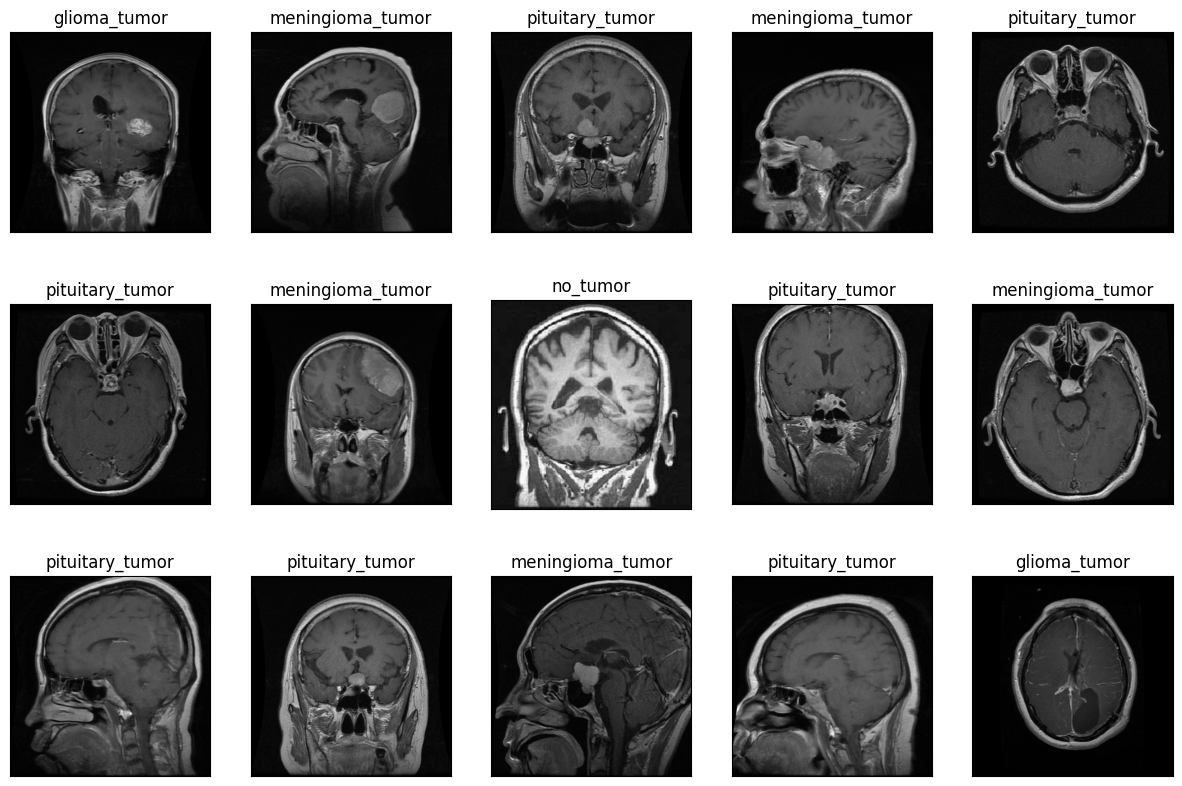

In [35]:
#Displaying a subsample of the dataset
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.images[i]))
    ax.set_title(df.label[i])
plt.show()

## Data Augmentation (tidak ada)

Seperti yang sudah dijelaskan di subsection sebelumnya, saya tidak melakukan data augmentasi lebih lanjut dikarenakan set data yang sudah kita miliki sudah beragam dari berbagai angle (tampak atas, tampak samping, tampak depan)

# Model Definition, Training & Evaluation

# Sequential Model (Tuning-Flatten)

In [46]:
input_shape = (512, 512, 3)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (5,5), activation='relu', input_shape=input_shape ),
    tf.keras.layers.MaxPool2D(pool_size = (5,5)),
    tf.keras.layers.Conv2D(8, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (3,3)),
    tf.keras.layers.Conv2D(8, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 508, 508, 8)       608       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 101, 101, 8)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 99, 99, 8)         584       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 33, 33, 8)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 31, 31, 8)         584       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 8)       

In [47]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)

history = model.fit(train_images, validation_data=val_images, epochs=6, callbacks=callback)

Epoch 1/6
592/592 [==============================] - 551s 926ms/step - loss: 1.9203 - accuracy: 0.3911 - val_loss: 1.1455 - val_accuracy: 0.5156
Epoch 2/6
592/592 [==============================] - 495s 837ms/step - loss: 1.0561 - accuracy: 0.5450 - val_loss: 0.9147 - val_accuracy: 0.5827
Epoch 3/6
592/592 [==============================] - 491s 830ms/step - loss: 0.8988 - accuracy: 0.6279 - val_loss: 0.8287 - val_accuracy: 0.6691
Epoch 4/6
592/592 [==============================] - 477s 805ms/step - loss: 0.7605 - accuracy: 0.6892 - val_loss: 0.8372 - val_accuracy: 0.6619
Epoch 5/6
592/592 [==============================] - 481s 813ms/step - loss: 0.6660 - accuracy: 0.7433 - val_loss: 0.7034 - val_accuracy: 0.7266
Epoch 6/6
592/592 [==============================] - 492s 831ms/step - loss: 0.5984 - accuracy: 0.7632 - val_loss: 0.7127 - val_accuracy: 0.7338


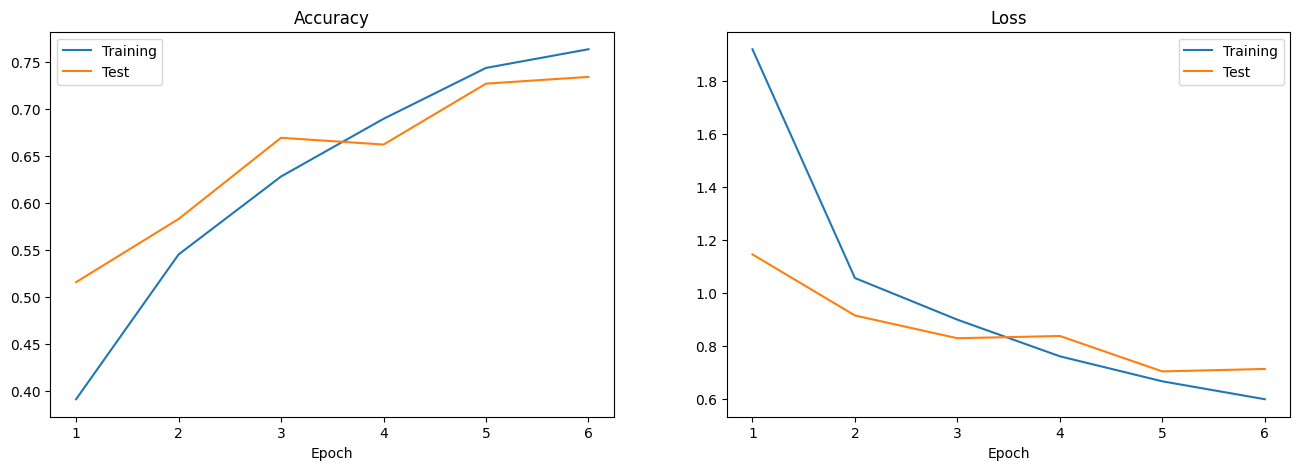

In [48]:
epochs=6

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epochs+1),history.history['accuracy'],label='Training')
ax[0].plot(range(1,epochs+1),history.history['val_accuracy'],label='Test')
ax[0].set_title('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend()

ax[1].plot(range(1,epochs+1),history.history['loss'],label='Training')
ax[1].plot(range(1,epochs+1),history.history['val_loss'],label='Test')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

# Sequential Model (Tuning-Global Average Pooling)

In [49]:
input_shape = (512, 512, 3)
model_tune = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (5,5), activation='relu', input_shape=input_shape ),
    tf.keras.layers.MaxPool2D(pool_size = (5,5)),
    tf.keras.layers.Conv2D(8, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (3,3)),
    tf.keras.layers.Conv2D(8, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='softmax')
])

model_tune.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 508, 508, 8)       608       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 101, 101, 8)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 99, 99, 8)         584       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 33, 33, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 31, 31, 8)         584       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 15, 15, 8)       

In [50]:
model_tune.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)

history_tune = model_tune.fit(train_images, validation_data=val_images, epochs=6, callbacks=callback)

Epoch 1/6
592/592 [==============================] - 501s 834ms/step - loss: 1.3330 - accuracy: 0.3552 - val_loss: 1.2568 - val_accuracy: 0.4365
Epoch 2/6
592/592 [==============================] - 478s 807ms/step - loss: 1.1512 - accuracy: 0.4926 - val_loss: 1.0103 - val_accuracy: 0.5755
Epoch 3/6
592/592 [==============================] - 487s 823ms/step - loss: 1.0691 - accuracy: 0.5302 - val_loss: 0.8864 - val_accuracy: 0.6163
Epoch 4/6
592/592 [==============================] - 475s 802ms/step - loss: 0.9629 - accuracy: 0.5932 - val_loss: 0.8830 - val_accuracy: 0.6355
Epoch 5/6
592/592 [==============================] - 491s 829ms/step - loss: 0.9346 - accuracy: 0.6347 - val_loss: 0.7905 - val_accuracy: 0.6906
Epoch 6/6
592/592 [==============================] - 494s 835ms/step - loss: 0.8572 - accuracy: 0.6668 - val_loss: 0.7509 - val_accuracy: 0.6859


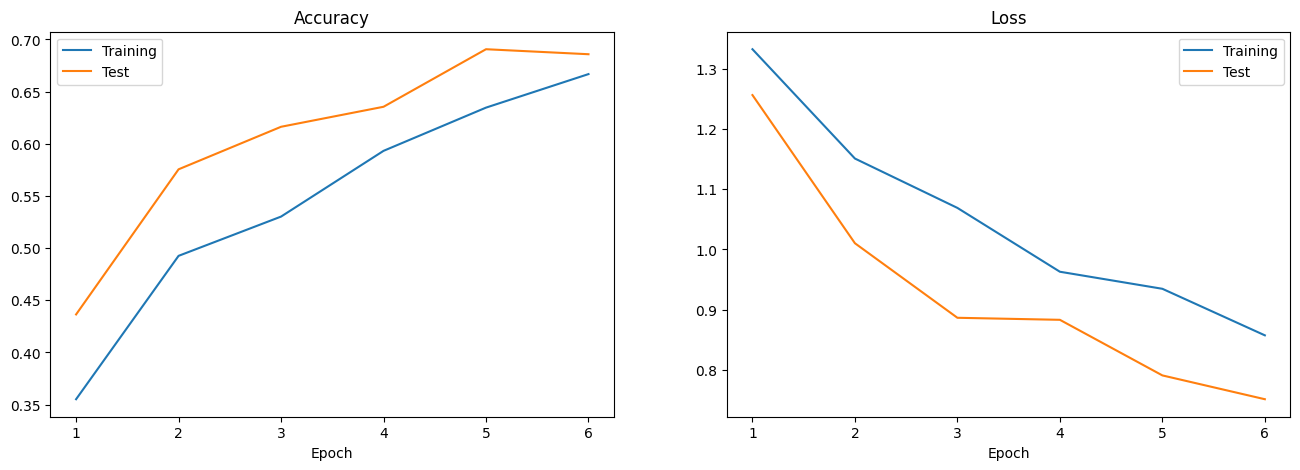

In [51]:
epochs=6

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epochs+1),history_tune.history['accuracy'],label='Training')
ax[0].plot(range(1,epochs+1),history_tune.history['val_accuracy'],label='Test')
ax[0].set_title('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend()

ax[1].plot(range(1,epochs+1),history_tune.history['loss'],label='Training')
ax[1].plot(range(1,epochs+1),history_tune.history['val_loss'],label='Test')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

Dari 2 model sequential di atas, saya memutuskan untuk menggunakan model sequential dengan tuning flatten karena lebih goodfit & mempunyai tingkat akurasi lebih baik (sebesar 76%) jika dibandingkan dengan model tuning Global Average Pooling (sebesar 68% & overfitting)


Pada model sequential ini saya menggunakan parameter adam & callback untuk memangkas waktu training model agar lebih pendek

Saya sudah mencoba menggunakan epoch 6, 25, 50 dan 80 dalam proses trial error, namun hasilnya tetap masih overfit dengan memakan waktu pengerjaan jauh lebih lama

In [52]:
pred = model.predict(test_images)
pred = np.argmax(pred, axis=1)

labels = train_images.class_indices
labels = dict((v,k) for k, v in labels.items())

print(labels)
print(pred)

123/123 [==============================] - 69s 562ms/step
{0: 'glioma_tumor', 1: 'meningioma_tumor', 2: 'no_tumor', 3: 'pituitary_tumor'}
[3 2 0 3 1 3 0 3 3 0 1 3 3 1 0 3 3 1 3 1 1 0 0 0 0 1 2 0 1 1 3 2 1 0 3 3 1
 1 0 1 1 3 1 1 1 1 1 0 1 1 0 0 2 3 1 0 0 1 3 0 0 0 0 1 0 1 1 1 1 2 1 3 1 1
 1 3 1 3 3 1 1 2 1 3 0 1 0 0 3 0 0 3 1 2 3 1 3 3 1 1 2 3 0 1 3 3 3 3 3 1 0
 1 3 1 3 3 1 1 3 1 3 0 3 1 0 1 1 1 0 1 3 1 1 3 0 0 0 1 1 3 0 2 1 3 1 1 1 1
 0 1 3 0 1 1 1 3 1 1 2 3 0 2 0 3 3 1 2 1 0 1 1 0 3 0 3 0 1 3 0 2 0 0 1 3 1
 3 3 0 1 3 1 3 1 1 2 3 0 2 1 3 1 0 0 3 2 0 3 0 1 3 1 0 3 1 3 0 2 0 1 2 1 1
 1 0 2 3 2 3 0 0 3 0 0 1 0 1 3 1 1 1 3 3 0 1 2 0 0 3 3 0 3 0 1 0 0 1 3 3 3
 3 3 0 3 2 0 0 1 3 3 3 1 1 0 2 1 1 0 3 1 3 0 1 1 2 3 1 0 3 1 0 3 3 1 1 1 3
 1 0 3 1 0 3 0 1 2 3 3 3 1 3 3 0 3 1 3 0 1 1 1 3 0 2 1 0 0 1 1 0 3 2 2 3 1
 0 2 0 2 1 3 1 1 3 2 1 0 1 1 2 1 1 3 3 2 0 1 3 0 1 3 0 3 3 0 0 1 0 1 1 3 3
 0 3 3 3 3 1 0 2 1 1 0 0 0 3 1 0 1 1 1 2 3 3 2 3 1 2 2 0 1 3 1 3 3 3 2 1 1
 3 1 0 3 3 1 1 3 3 1 1 0 3 0 1 1 3 3 

In [53]:
y_pred = [labels[k] for k in pred]
print(classification_report(test_df.label, y_pred))
print('--------------------------------')
print(confusion_matrix(test_df.label, y_pred))
print('--------------------------------')

                  precision    recall  f1-score   support

    glioma_tumor       0.83      0.65      0.73       154
meningioma_tumor       0.64      0.75      0.69       153
        no_tumor       0.87      0.59      0.70        68
 pituitary_tumor       0.72      0.91      0.80       117

        accuracy                           0.73       492
       macro avg       0.77      0.72      0.73       492
    weighted avg       0.75      0.73      0.73       492

--------------------------------
[[100  37   4  13]
 [ 13 114   2  24]
 [  6  17  40   5]
 [  1   9   0 107]]
--------------------------------


Dalam model kali ini terlihat bahwa kategori 'No Tumor' menjadi target karena mempunyai data entry paling sedikit dibandingkan dengan 3 kategori lainnya.

Namun saya akan menggunakan accuracy untuk mengukur tingkat validasi model ini dikarenakan bentuk dataset yang imbalance.

# Model Analysis

Saya sudah melakukan trial & error dengan menggunakan beberapa tuning pada layer dan juga transfer learning yang disediakan dalam keras, namun dikarenakan keterbatasan hardware sehingga proses training model tidak bisa sampai selesai akibat pemakaian ram yang melebihi kapasitas

# Overall Analysis

Secara keseluruhan untuk proses computer vision mengenai deteksi tumor otak sangat mungkin untuk dilakukan, sudah banyak contoh model yang digunakan untuk modeling brain tumor dengan berbagai metode seperti pytorch salah satunya.

Saya merasa optimalisasi IT untuk bidang kesehatan sangat perlu dilakukan dikarenakan hal ini penting untuk meningkatkan taraf hidup masyarakat dan juga membantu para tenaga medis dalam pengambilan keputusan yang lebih terukur

# Model Saving

In [54]:
model.save('cnn.h5')